In [9]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

#Load from CSV
df = pd.read_csv("Iris.csv")

# change
pathX = df.iloc[:, :-1].values

# All columns except last → Features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Last column only → Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions & accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy (CSV iris) with k={k}: {accuracy:.2f}")



Accuracy (CSV iris) with k=3: 1.00


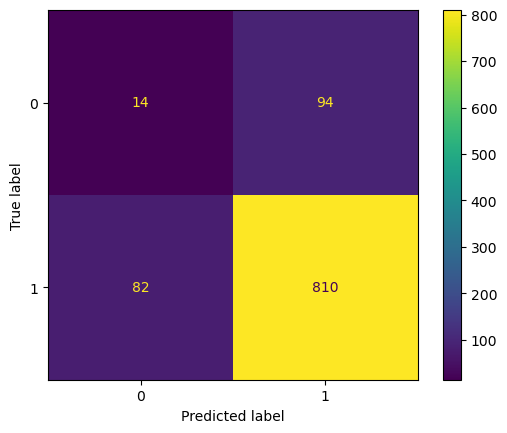

In [3]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [9]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

# Same data as before
# Features: [Outlook, Temperature, Humidity, Wind]
X_train_text = [
    ['Sunny', 'Hot', 'High', 'Weak'], ['Sunny', 'Hot', 'High', 'Strong'],
    ['Overcast', 'Hot', 'High', 'Weak'], ['Rain', 'Mild', 'High', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Weak'], ['Rain', 'Cool', 'Normal', 'Strong'],
    ['Overcast', 'Cool', 'Normal', 'Strong'], ['Sunny', 'Mild', 'High', 'Weak'],
    ['Sunny', 'Cool', 'Normal', 'Weak'], ['Rain', 'Mild', 'Normal', 'Weak'],
    ['Sunny', 'Mild', 'Normal', 'Strong'], ['Overcast', 'Mild', 'High', 'Weak'],
    ['Overcast', 'Hot', 'Normal', 'Weak'], ['Rain', 'Mild', 'High', 'Strong']
]
y_train = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

# --- Step 1: Encode the categorical features into numbers ---
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train_text)

# --- Step 2: Create and train the CategoricalNB model ---
# alpha=1.0 is for Laplace smoothing, just like we did from scratch.
model = CategoricalNB(alpha=1.0)
model.fit(X_train_encoded, y_train)

# --- Step 3: Make a prediction ---
# New data to predict
X_test_text = [['Sunny', 'Cool', 'High', 'Strong']]

# IMPORTANT: You must use the SAME encoder that was fit on the training data
X_test_encoded = encoder.transform(X_test_text)

# Predict the label
prediction = model.predict(X_test_encoded)
# Predict the probability of each class
probabilities = model.predict_proba(X_test_encoded)

print(f"Data to predict: {X_test_text[0]}")
print(f"Encoded data: {X_test_encoded[0]}")
print(f"Prediction: Play Tennis? -> {prediction[0]}")
print(f"Probabilities (No, Yes): {probabilities[0]}")

Data to predict: ['Sunny', 'Cool', 'High', 'Strong']
Encoded data: [2. 0. 0. 0.]
Prediction: Play Tennis? -> No
Probabilities (No, Yes): [0.77425134 0.22574866]
